In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from analysis_tools import XTESAlign
import imageio.v2 as imageio
from scipy import ndimage

## Reference pattern

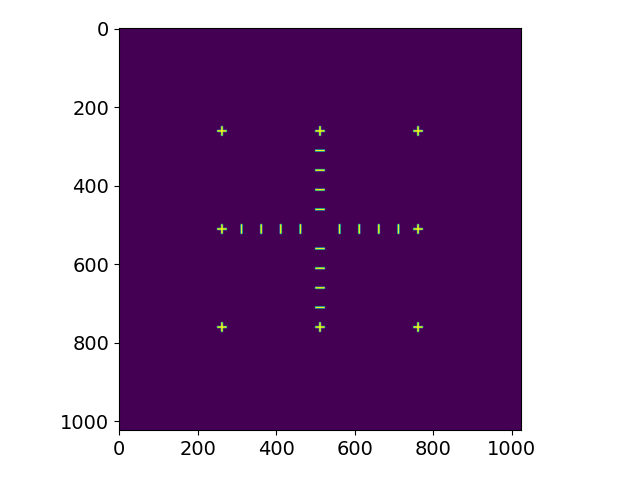

In [2]:
im0 = imageio.imread("XTES_pattern.png")[:, :, 3]

plt.figure()
plt.imshow(im0)

## Test image, with adjustments

Text(0.5, 1.0, 'Adjusted image')

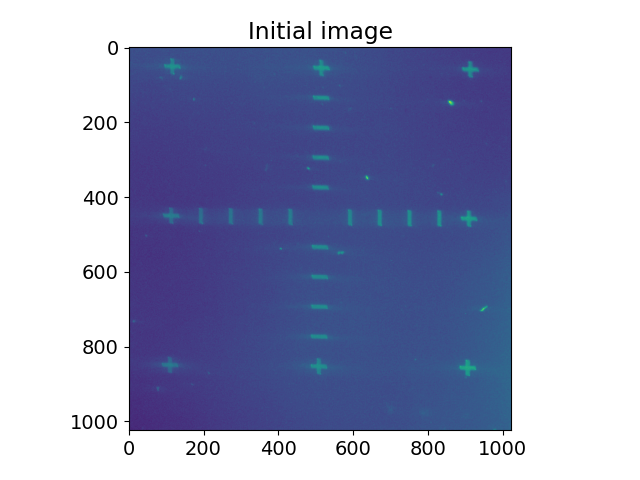

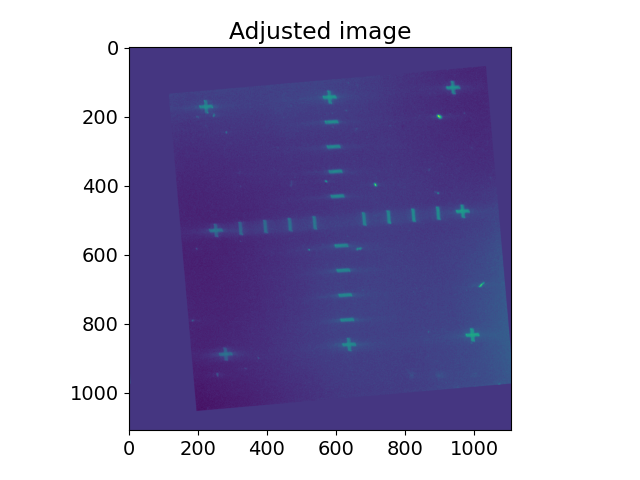

In [11]:
im = imageio.imread('im4l0_001.tiff')
im = im-np.min(im)

im2 = np.zeros_like(im,dtype=float)

plt.figure()
plt.imshow(im)
plt.title('Initial image')
# rotation, translation, and zoom

# adjust zoom by some factor
zoom_adjust = 0.9
im = ndimage.zoom(im,zoom_adjust)
bg = XTESAlign.get_borderval(im)
im2 += bg
im2 = XTESAlign.embed_to(im2,im)

# adust rotation by some number of degrees
degree_rotation = 5
im2 = ndimage.rotate(im2,degree_rotation,mode='nearest')

# adjust translation by some number of pixels
xShift = 10
yShift = 50
im2 = np.roll(im2,[yShift, xShift])

plt.figure()
plt.imshow(im2)
plt.title('Adjusted image')

## Image registration

5
-85.0
5.0


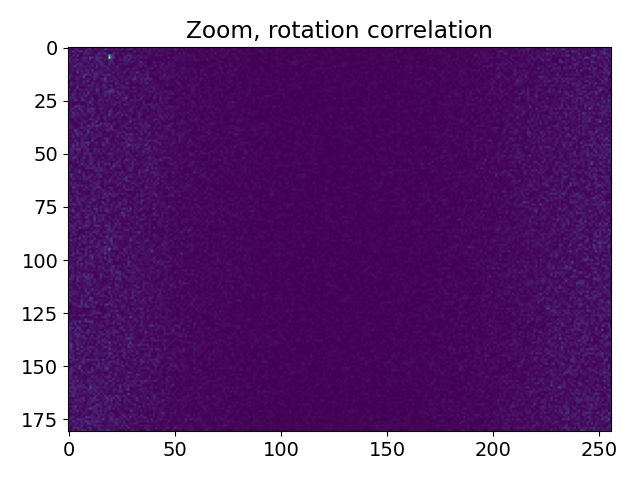

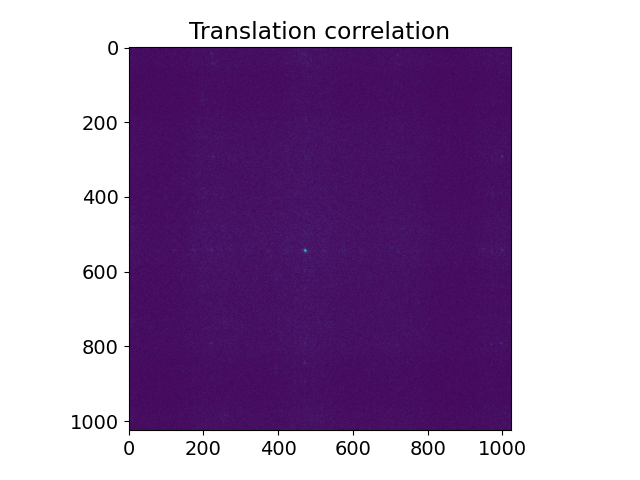

In [12]:
# alignment object
align = XTESAlign()
output = align.check_alignment(im2)

Text(0.5, 1.0, 'Registered image')

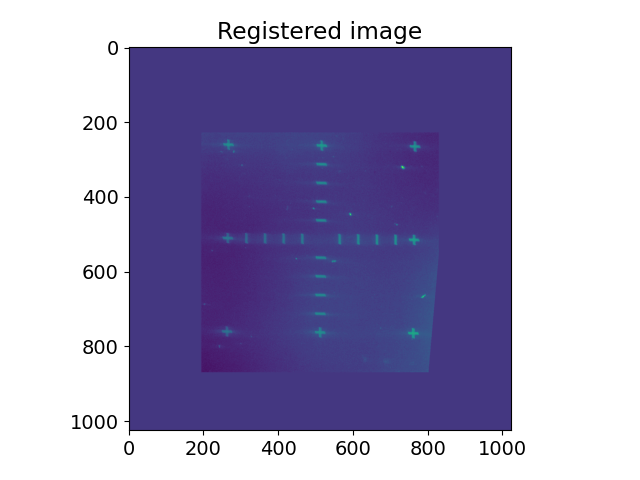

In [13]:
plt.figure()
plt.imshow(output['shifts'])
plt.title('Registered image')

## Results

In [14]:
print('Input rotated by {} degrees'.format(output['rotation']))
print('Input scaled by {} relative to reference'.format(output['scale']))
# calculate pixel size based on reference image
pixel_size = 2e-3/500/output['scale']*1e6
print('Effective pixel size: {:.2f} microns'.format(pixel_size))
print('Input translated by {:.2f} microns in x and {:.2f} microns in y'.format(
    output['translation'][1]*pixel_size,output['translation'][0]*pixel_size))


Input rotated by 5.0 degrees
Input scaled by 1.4356196266083892 relative to reference
Effective pixel size: 2.79 microns
Input translated by -111.45 microns in x and 91.95 microns in y
